# Project: Grammar Error Correction

This project aims to develop a quique autogrammer correction system using `Natural Language Processing` NLP techniques.


### Explanatory Data Analysis Process (EDA)

Let's import all the necessary packages required for this excersise.

#### Import packages required for

In [15]:
import re
import unicodedata
import spacy
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Let's read the entire corpus that we have selected for the grammar correction excersise.

In [3]:
data_df = pd.read_csv("grammar_correction.csv", sep = ",")

data_df.head(10)


,Ungrammatical_Statement,Standard_English
0,I goes to the store everyday.,I go to the store everyday.
1,They was playing soccer last night.,They were playing soccer last night.
2,She have completed her homework.,She has completed her homework.
3,He don't know the answer.,He doesn't know the answer.
4,The sun rise in the east.,The sun rises in the east.
5,I am eat pizza for lunch.,I am eating pizza for lunch.
6,The students studies for the exam.,The students study for the exam.
7,The car need to be repaired.,The car needs to be repaired.
8,She will goes to the party tonight.,She will go to the party tonight.
9,They watches the movie together.,They watch the movie together.


As seen above, we have 2 columns `Ungrammatical_statement` which represents incorrect statements, and `Standard_English` column which represents correct english.

Let's describe the data

In [4]:
data_df.describe()

,Ungrammatical_Statement,Standard_English
count,1733,1733
unique,1610,1603
top,That was really great movie,Can you help me with this problem?
freq,4,4


As we can see, there are some statements which are repeated. Let's remove them.


In [10]:
data_df = data_df.drop_duplicates()

data_df.describe()


,Ungrammatical_Statement,Standard_English
count,1611,1611
unique,1610,1603
top,That was really great movie,The computer is not working properly.
freq,2,2


Let's investigate missing data

In [6]:
missing_calues_total = data_df.isnull().sum()
missing_calues_total.head(5)

Ungrammatical_Statement    0
Standard_English           0
dtype: int64

As shown above, there are no missing values

Let's check the number of words in grammarical incorrect and correct statements

Text(0.5, 0, 'Number of words in the Ungrammatical_Statement sentences')

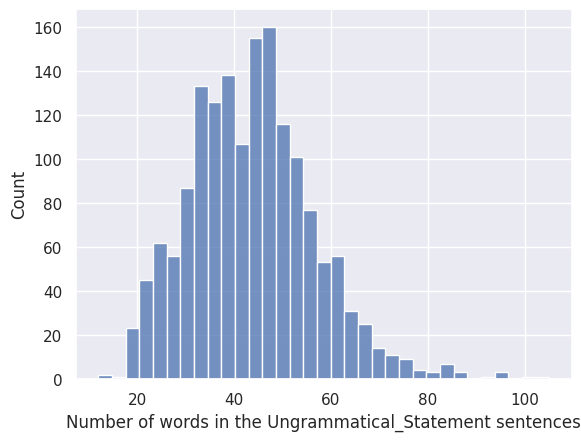

In [13]:
length_1 = [len(data_df['Ungrammatical_Statement'].iloc[i]) for i in range(len(data_df['Ungrammatical_Statement']))]
length_2 = [len(data_df['Standard_English'].iloc[i]) for i in range(len(data_df['Standard_English']))]

sns.set_theme()
ax = sns.histplot(data = length_1)
ax.set_xlabel('Number of words in the Ungrammatical_Statement sentences')

Text(0.5, 0, 'Number of words in the Standard_English sentences')

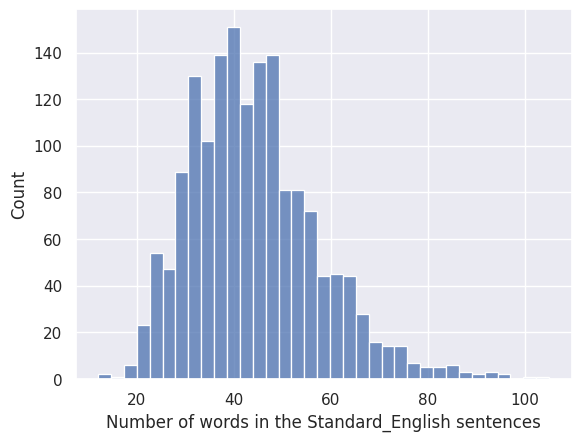

In [14]:
sns.set_theme()
ax = sns.histplot(data = length_2)
ax.set_xlabel('Number of words in the Standard_English sentences')

Both the graphs are in the look very similar and hence can there is no further processing required.

Let's also check the TOP 20 words for each type of sentences

In [16]:
def plot_of_top_n_words(sentence, title, n):
  words = sentence.split()
  counter = Counter(words)
  mostCommon = counter.most_common(n)
  words, counts = zip(*mostCommon)
  plt.figure(figsize= (10, 5))
  plt.bar(words, counts)
  plt.title(f'The TOP{n} words in {title}')
  plt.xticks(rotation = 45)
  plt.ylabel('Frequency')
  plt.show()

In [17]:
ungrammaticalStatementSentences = " ".join(data_df['Ungrammatical_Statement'])
standardEnglishSentences = " ".join(data_df['Standard_English'])

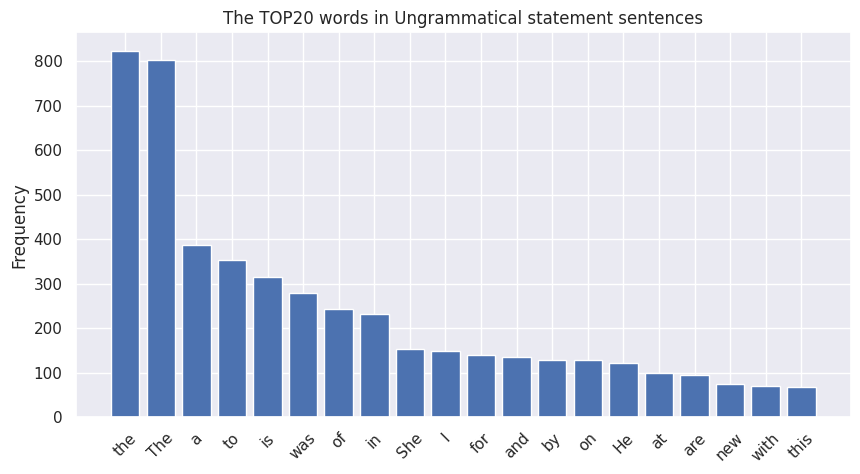

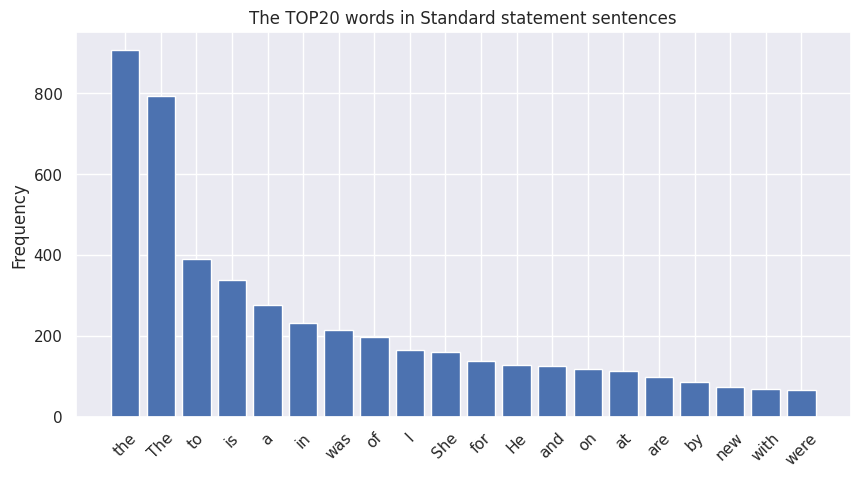

In [19]:
plot_of_top_n_words(ungrammaticalStatementSentences, 'Ungrammatical statement sentences', 20)
plot_of_top_n_words(standardEnglishSentences, 'Standard statement sentences', 20)

#### Word Cloud for words present in Ungrammatical_Statement

Let's remove all the stopwords before proceeding with plotting the word cloud for each type of sentences

In [22]:
def plot_word_cloud(sentences, title):
  stopwords = set(STOPWORDS)
  filtered_text = ' '.join([word for word in sentences.split() if word.lower() not in stopwords])
  wordcloud = WordCloud(width = 1000, height = 800, background_color = 'white', min_font_size = 12).generate(filtered_text)
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.tight_layout(pad = 0)
  plt.title(title)
  plt.show()

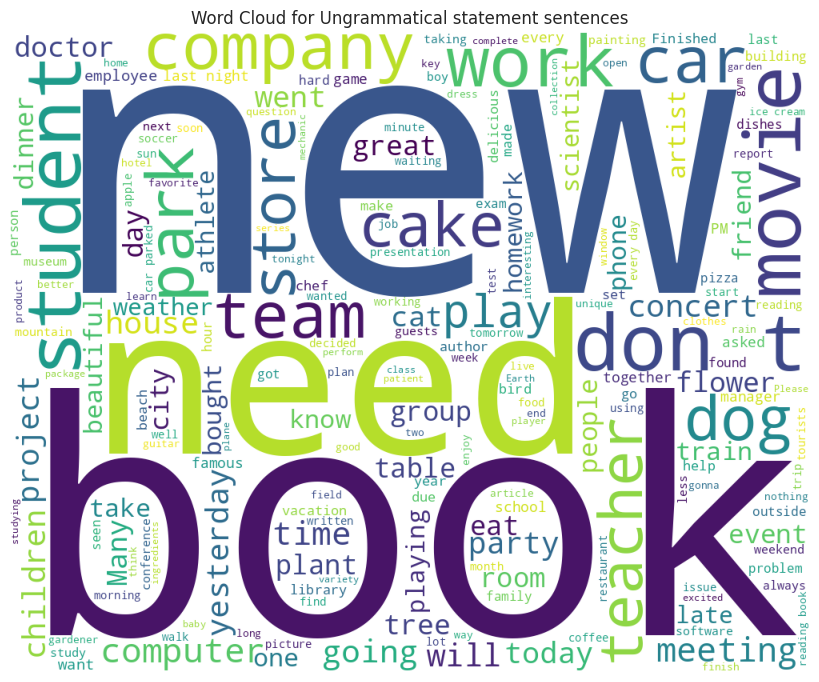

In [23]:
plot_word_cloud(ungrammaticalStatementSentences, 'Word Cloud for Ungrammatical statement sentences')

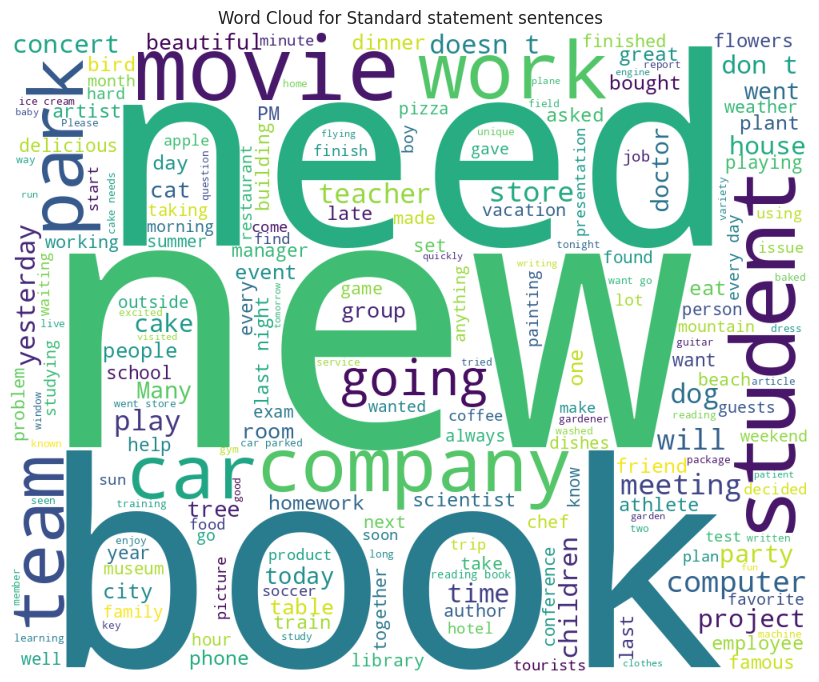

In [24]:
plot_word_cloud(standardEnglishSentences, 'Word Cloud for Standard statement sentences')

Let's plot the unique words for each type of sentences

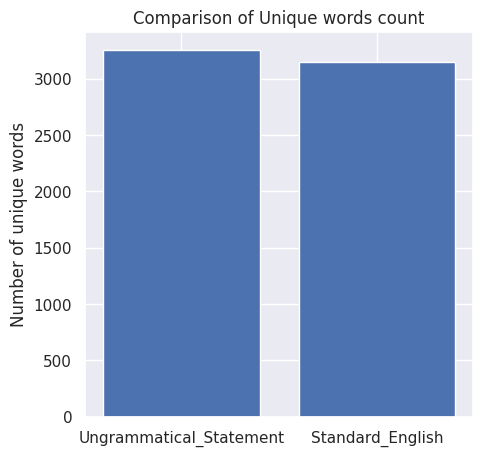

In [27]:
unique_incorrect_words = len(set(ungrammaticalStatementSentences.split()))
unique_correct_words = len(set(standardEnglishSentences.split()))

plt.figure(figsize = (5, 5))
plt.bar(['Ungrammatical_Statement', 'Standard_English'], [unique_incorrect_words, unique_correct_words])
plt.title('Comparison of Unique words count')
plt.ylabel('Number of unique words')
plt.show()


This data will be now used to train the models. We will export to another file.

In [25]:
data_df.to_csv('processed_grammar_correction.csv', index=False)